In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


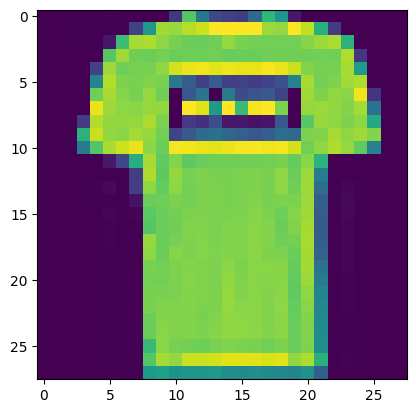

In [2]:
plt.imshow(x_train[1])

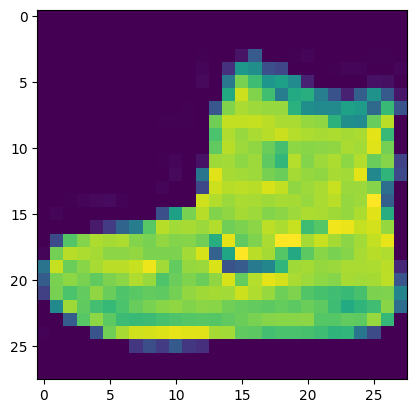

In [3]:
plt.imshow(x_train[0])


In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [5]:
x_train.shape
(60000, 28, 28)
x_test.shape
(10000, 28, 28, 1)
y_train.shape
(60000,)
y_test.shape
(10000,)

(10000,)

In [7]:
model = keras.Sequential([
keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
keras.layers.MaxPooling2D((2,2)),
keras.layers.Dropout(0.25),
keras.layers.Conv2D(64, (3,3), activation='relu'),
keras.layers.MaxPooling2D((2,2)),
keras.layers.Dropout(0.25),
keras.layers.Conv2D(128, (3,3), activation='relu'),
keras.layers.Flatten(),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dropout(0.25),
keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.5647 - accuracy: 0.7910 - val_loss: 0.3750 - val_accuracy: 0.8623
Epoch 2/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.3691 - accuracy: 0.8646 - val_loss: 0.3275 - val_accuracy: 0.8813
Epoch 3/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.3239 - accuracy: 0.8809 - val_loss: 0.2978 - val_accuracy: 0.8898
Epoch 4/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2956 - accuracy: 0.8900 - val_loss: 0.2798 - val_accuracy: 0.8964
Epoch 5/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2792 - accuracy: 0.8958 - val_loss: 0.2683 - val_accuracy: 0.9013
Epoch 6/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2667 - accuracy: 0.9010 - val_loss: 0.2651 - val_accuracy: 0.9000
Epoch 7/10
1875/1875 [==============================] - 72s 39ms/step - loss: 0.2528 - accuracy: 0.9065 - val_loss: 0.2596 -

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc*100)

313/313 [==============================] - 4s 14ms/step - loss: 0.2539 - accuracy: 0.9100
Test accuracy: 91.00000262260437
